# P1 - Perceptual phenomenon

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [2]:
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

data_path = "data/test_results.csv"

df = pd.read_csv(data_path, sep=';')
df['Difference'] = df.Congruent - df.Incongruent

cond1 = df.Congruent.values
cond2 = df.Incongruent.values
diff = df.Difference.values

# Probability density function of normal distribution
def norm_pdf(x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2/2)/(sigma*np.sqrt(2*np.pi))

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.


### 1. What is our independent variable? What is our dependent variable?

Our independent variable is the **word condition**: either congruent or incongruent. 

Our dependent variable is the **time it takes to name the ink colors in seconds**. 

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

H0 : Null hypothesis ==> **the incongruent condition does not increase the average time needed to read the list of words**, i.e. the average recorded time for incongruent words is equal or lower than for congruent words.

H1 : Alternative hypothesis ==> **the incongruent condition does increase the average time needed to read the list of words**, i.e. the average recorded time for incongruent words is higher than for congruent words.

As the same person is trying the two different word condition in a row, we are working with **dependent samples**. As we want to evaluate the difference between these two word conditions (and we do not know the mean&standard deviation for the entire population), we are going to follow a **one sample t-test** with the recorded time difference between the two test conditions.

According to the definition of our null hypothesis, we are focusing on a **one-tailed test in the negative direction**. 

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In order to have a first look at the data, let's check the main indicators (mean, standard deviation, minimum, maximum and quartiles) for the two sets of samples.

In [3]:
print(df.describe())


       Congruent  Incongruent  Difference
count  24.000000    24.000000   24.000000
mean   14.051125    22.015917   -7.964792
std     3.559358     4.797057    4.864827
min     8.630000    15.687000  -21.919000
25%    11.895250    18.716750  -10.258500
50%    14.356500    21.017500   -7.666500
75%    16.200750    24.051500   -3.645500
max    22.328000    35.255000   -1.950000


We can observe that the means are fairly different between the two conditions. The congruent test samples show a lower mean that the incongruent test samples, which does not go in the direction of our null hypothesis. 

We can also observe that the mean and the median are close, which is a good sign (but definitely not sufficient) if we want to approximate our variable distribution by a gaussian law, or a t-distribution. 



### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Through the following lines of code, we will see the frequency histograms for the 2 word conditions.

Out of curiosity, I also plotted the normed histogram with a fitted normal probability density function. 


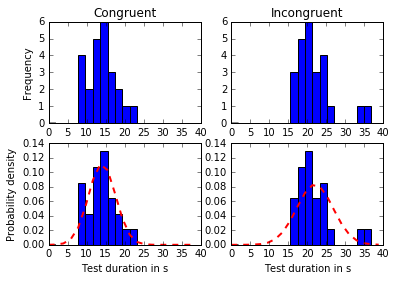

In [150]:
%matplotlib inline  

range_x = (0, 1.1*np.max([cond1.max(), cond2.max()]))

# Frequency histograms
plt.subplot(2,2,1)
plt.hist(cond1, bins = 20, range = range_x, normed=False)
plt.title("Congruent")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(cond2, bins = 20, range = range_x, normed=False)
plt.title("Incongruent")

# Normed histograms
plt.subplot(2,2,3)
_, bins, _ = plt.hist(cond1, bins = 20, range = range_x, normed=True)
y1 = norm_pdf(bins, np.mean(cond1), np.std(cond1, ddof = 1))
plt.plot(bins, y1, 'r--', linewidth=2)
plt.xlabel("Test duration in s")
plt.ylabel("Probability density")

plt.subplot(2,2,4)
_, bins, _ = plt.hist(cond2, bins = 20, range = range_x, normed=True)
y2 = norm_pdf(bins, np.mean(cond2), np.std(cond2, ddof = 1))
plt.plot(bins, y2, 'r--', linewidth=2)
plt.xlabel("Test duration in s")

plt.show()

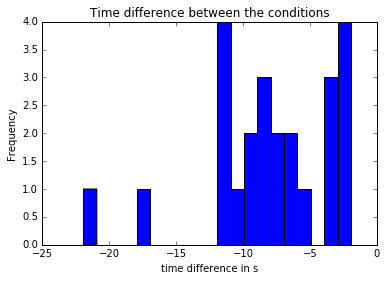

In [166]:
plt.hist(diff, bins = 20, normed=False)
plt.title("Time difference between the conditions")
plt.ylabel("Frequency")
plt.xlabel("time difference in s")

plt.show()

It appears that the incongruent test sample is more inclined generally to **higher test duration** than the congruent. 

We can also observe that the 2 distributions seem to follow a **normal distribution law**, which could have been expected thanks to the **central limit theorem**. Though, as the overall data is quite low (24 candidates per condition), and we do not know the population mean and standard deviation, the fitting is not perfect. 

By looking at the mean differences distribution, we can observe that **they are all negative**, which lead us to think that the alternative hypothesis has a high chance to be validated.


### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


Cohen's d = mean diff / s

r² = t²/(t²+df)




In [156]:
# Degrees of freedom
n = len(diff)
df = n - 1

# t-critical for one-tailed test in the negative direction for different alpha values 
alpha = [0.05,0.01, 0.001]
t_crit = [-t.ppf(1-a, df) for a in alpha]
print('Degrees of freedom = {0}'.format(df))
for _ in range(len(alpha)):
    print ('t-critical for a one-sided test in the negative direction with {0:.2f} alpha level: {1:.3f}'.format(alpha[_], t_crit[_]))

# Mean difference
mdif = np.mean(diff)

# t-statistic calculation
s = np.std(diff, ddof = 1)
sem = s/np.sqrt(n)
t_stat = mdif/sem
print('\nSamples standard deviation = {0:.3f}'.format(s))
print('Standard error of the mean = {0:.3f}'.format(sem))
print('t-statistic = {0:.3f}'.format(t_stat))



Degrees of freedom = 23
t-critical for a one-sided test in the negative direction with 0.05 alpha level: -1.714
t-critical for a one-sided test in the negative direction with 0.01 alpha level: -2.500
t-critical for a one-sided test in the negative direction with 0.00 alpha level: -3.485

Samples standard deviation = 4.865
Standard error of the mean = 0.993
t-statistic = -8.021


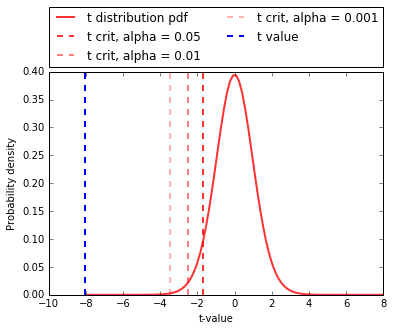

In [157]:
x = np.linspace(-8,8, 100)
opa = [.8, .5, .3] # different opacities for different alpha values

plt.plot(x, t.pdf(x, df),'r-', lw=2, alpha=0.8, label='t distribution pdf')
for i in range(len(t_crit)):
    plt.axvline(x=t_crit[i], linewidth=2, color='r', alpha = opa[i], ls = '--', label='t crit, alpha = {0}'.format(alpha[i]))
plt.axvline(x=t_stat, linewidth=2, color='b', ls = '--', label='t value')
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

plt.show()

In [163]:
# p-value
p = t.cdf(t_stat, df)
print('p-value: {0:.3f} %'.format(p*100))

# Margin of error & upper and lower limit for difference between the 2 conditions
marg_err = t.ppf(1-0.001/2, df)*sem
low_lim = mdif - marg_err
upp_lim = mdif + marg_err
print('Lower limit = {0:.3f} with a 99.9% confidence interval'.format(low_lim))
print('Upper limit = {0:.3f} with a 99.9% confidence interval\n'.format(upp_lim))

# Cohen's d 
d = mdif / s
print('Cohen\'s d: {0:.2f}'.format(d))

# r²
r_squ = t_stat**2/(t_stat**2 + df)
print('r²: {0:.2f}'.format(r_squ))

p-value: 0.000 %
Lower limit = -11.706 with a 99.9% confidence interval
Upper limit = -4.223 with a 99.9% confidence interval

Cohen's d: -1.64
r²: 0.74


We can conclude that according to this t-test, **we can reject the Null hypothesis**. Our t-value is lower than the t-critical value with an **alpha level of 0.001**. Our results are statistically significant.

The average recorded time for congruent words **is lower than** for incongruent words and we can estimate this difference **between 4.2s and 11.7s with a 99.9% confidence interval**.

Our Cohen's d coefficient is equal to -1.64, which is very high. Last but not least, the r² coefficient tells us that, for 24 samples we tested, **the word condition is responsible for 74% of the difference** between the 2 recorded times.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions

For the incongruent condition, our brain has to deal with two different inputs (word and color) that are contradictory. My opinion is that, as our brain is more used to read words than to recognize color, the processing speed needed to read the word is lower than to recognize the word color. Hence, it tends to choose first the input from the word, which it has to correct afterwards.

One experiment that could be interesting to conduct to explore this hypothesis would be to do this test with children that do not have a strong reading background. It would be interesting to see whether the average time difference is still so high between the two conditions, or it is reduced.

Another suggestion would be to redo this test with adults, but in this case, ask to read the word instead of naming the color. If our hypothesis is right, there should not be a significant difference between the two conditions. 

If we are looking for a similar effect, we could think of comparing digits from different sizes. For the congruent condition: the bigger the digit, the bigger its size. For the incongruent condition, the size digit is randomly chosen.  